In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [155]:
# load train data and make it a dataframe
train = pd.read_csv('train.csv')
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_avg_article_rating,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_article_rating,m_nb_images,s_date,id,m_total_vu,conversion_rate
0,66016,4,464,98,10,0.0,5,1.00,NaN,False,4129,511.74,NaN,1.0,2020-01-01,0,1,0.0
1,123432,4,464,234,10,0.0,5,5.59,5.0,False,1957,211.19,2.0,1.0,2020-01-01,1,2,0.0
2,1169726,21,464,234,10,0.0,5,6.11,3.0,False,2558,116.89,2.0,1.0,2020-01-01,2,5,0.0
3,188236,48,464,234,11500,0.0,16,9999.00,NaN,False,1994,749.00,NaN,3.0,2020-01-01,3,1,0.0
4,85080,22,464,234,10,0.0,5,10.96,4.7,False,2647,193.57,168.0,1.0,2020-01-01,4,87,0.0


In [156]:
#  look for duplicate rows and total duplicated rows
duplicates = train.duplicated().sum()
print('Number of duplicate rows:', duplicates)

Number of duplicate rows: 0


In [157]:
# look for missing values for each column in terms of percentage
missing_values = train.isnull().mean()*100
print('Missing values for each column in percentage:')
print(missing_values)

Missing values for each column in percentage:
s_product                0.000000
s_brand                  0.000000
s_family                 0.000000
s_lowest_category        0.000000
s_provider               0.000000
s_retail_price           0.000000
s_shipping_time          0.000000
s_weight                 0.000000
m_avg_article_rating    50.029792
m_has_pdf                0.000000
m_length_description     0.000000
m_unit_price_vat_inc     0.000000
m_nb_article_rating     49.424686
m_nb_images              0.000403
s_date                   0.000000
id                       0.000000
m_total_vu               0.000000
conversion_rate          0.000000
dtype: float64


In [158]:
# drop m_avg_article_rating and m_nb_article_rating columns
train.drop(['m_avg_article_rating', 'm_nb_article_rating'], axis=1, inplace=True)


In [159]:
# drop missing rows in m_nb_images column
train.dropna(subset=['m_nb_images'], inplace=True)

In [160]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,m_total_vu,conversion_rate
0,66016,4,464,98,10,0.0,5,1.00,False,4129,511.74,1.0,2020-01-01,0,1,0.0
1,123432,4,464,234,10,0.0,5,5.59,False,1957,211.19,1.0,2020-01-01,1,2,0.0
2,1169726,21,464,234,10,0.0,5,6.11,False,2558,116.89,1.0,2020-01-01,2,5,0.0
3,188236,48,464,234,11500,0.0,16,9999.00,False,1994,749.00,3.0,2020-01-01,3,1,0.0
4,85080,22,464,234,10,0.0,5,10.96,False,2647,193.57,1.0,2020-01-01,4,87,0.0


In [161]:
# get data type of each column
print('Data type of each column:')
print(train.dtypes)

Data type of each column:
s_product                 int64
s_brand                   int64
s_family                  int64
s_lowest_category         int64
s_provider                int64
s_retail_price          float64
s_shipping_time           int64
s_weight                float64
m_has_pdf                  bool
m_length_description      int64
m_unit_price_vat_inc    float64
m_nb_images             float64
s_date                   object
id                        int64
m_total_vu                int64
conversion_rate         float64
dtype: object


In [162]:
# convert s_date to datetime
train['s_date'] = pd.to_datetime(train['s_date'])
train['s_date']

0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
248381   2020-01-31
248382   2020-01-31
248383   2020-01-31
248384   2020-01-31
248385   2020-01-31
Name: s_date, Length: 248385, dtype: datetime64[ns]

In [163]:
# create day of the week, day, month , year columns
train['day_of_week'] = train['s_date'].dt.day_name()
train['day'] = train['s_date'].dt.day
train['month'] = train['s_date'].dt.month

In [164]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,m_total_vu,conversion_rate,day_of_week,day,month
0,66016,4,464,98,10,0.0,5,1.00,False,4129,511.74,1.0,2020-01-01,0,1,0.0,Wednesday,1,1
1,123432,4,464,234,10,0.0,5,5.59,False,1957,211.19,1.0,2020-01-01,1,2,0.0,Wednesday,1,1
2,1169726,21,464,234,10,0.0,5,6.11,False,2558,116.89,1.0,2020-01-01,2,5,0.0,Wednesday,1,1
3,188236,48,464,234,11500,0.0,16,9999.00,False,1994,749.00,3.0,2020-01-01,3,1,0.0,Wednesday,1,1
4,85080,22,464,234,10,0.0,5,10.96,False,2647,193.57,1.0,2020-01-01,4,87,0.0,Wednesday,1,1


In [165]:
train['s_family'].unique()

array([464, 674, 824])

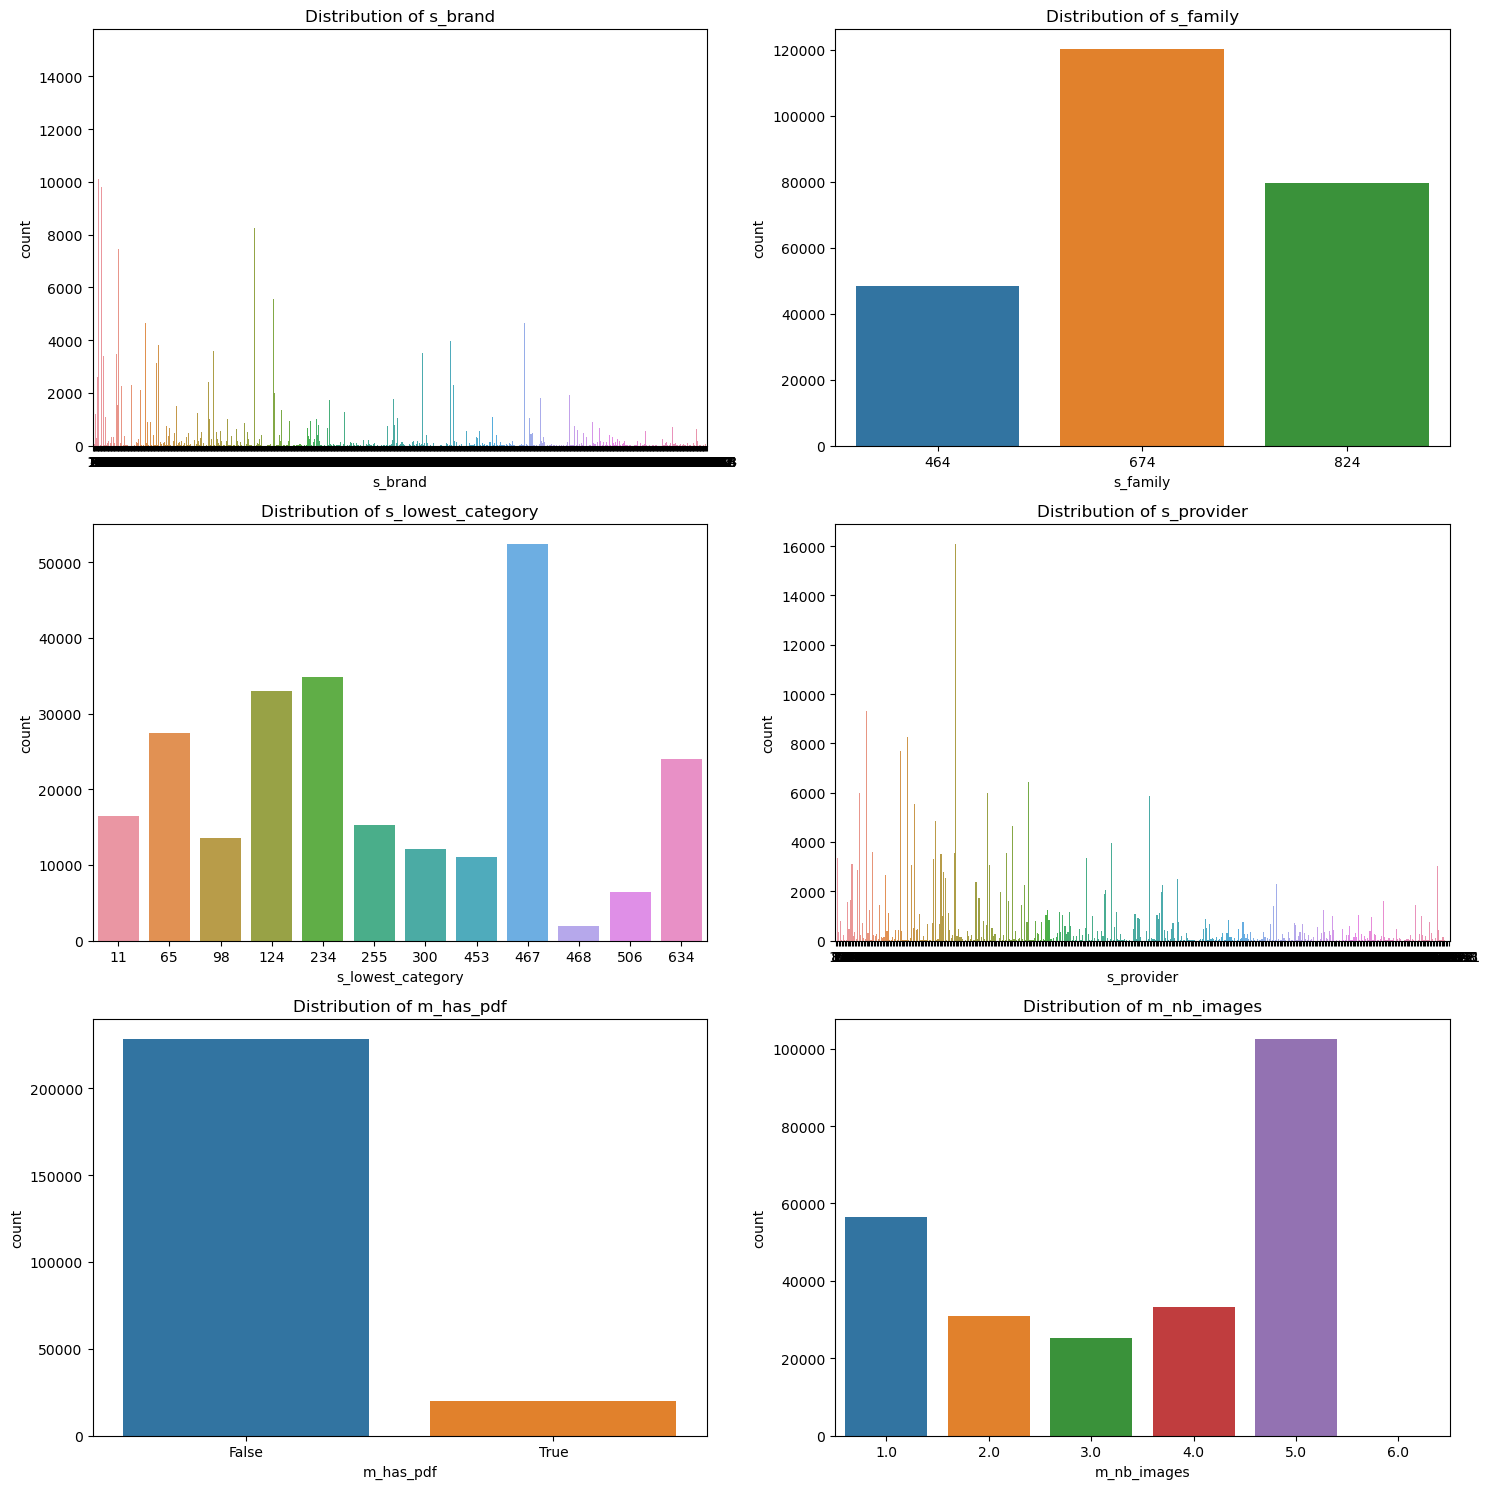

In [166]:
# look at distribution of s_brand, s_family, s_lowest_category, s_provider, m_has_pdf, m_nb_images categorical variables. 
# plot bar chart with count of each of these variables with titles
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.countplot(x='s_brand', data=train, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of s_brand')
sns.countplot(x='s_family', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of s_family')
sns.countplot(x='s_lowest_category', data=train, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of s_lowest_category')
sns.countplot(x='s_provider', data=train, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of s_provider')
sns.countplot(x='m_has_pdf', data=train, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of m_has_pdf')
sns.countplot(x='m_nb_images', data=train, ax=ax[2, 1])
ax[2, 1].set_title('Distribution of m_nb_images')
plt.tight_layout()
plt.show()



In [167]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,m_total_vu,conversion_rate,day_of_week,day,month
0,66016,4,464,98,10,0.0,5,1.00,False,4129,511.74,1.0,2020-01-01,0,1,0.0,Wednesday,1,1
1,123432,4,464,234,10,0.0,5,5.59,False,1957,211.19,1.0,2020-01-01,1,2,0.0,Wednesday,1,1
2,1169726,21,464,234,10,0.0,5,6.11,False,2558,116.89,1.0,2020-01-01,2,5,0.0,Wednesday,1,1
3,188236,48,464,234,11500,0.0,16,9999.00,False,1994,749.00,3.0,2020-01-01,3,1,0.0,Wednesday,1,1
4,85080,22,464,234,10,0.0,5,10.96,False,2647,193.57,1.0,2020-01-01,4,87,0.0,Wednesday,1,1


In [168]:
# get mode of s_brand, s_family, s_lowest_category, s_provider, m_has_pdf, m_nb_images
s_brand_mode = train['s_brand'].mode()[0]
s_family_mode = train['s_family'].mode()[0]
s_lowest_category_mode = train['s_lowest_category'].mode()[0]
s_provider_mode = train['s_provider'].mode()[0]
m_has_pdf_mode = train['m_has_pdf'].mode()[0]
m_nb_images_mode = train['m_nb_images'].mode()[0]
print('Mode of s_brand:', s_brand_mode)
print('Mode of s_family:', s_family_mode)
print('Mode of s_lowest_category:', s_lowest_category_mode)
print('Mode of s_provider:', s_provider_mode)
print('Mode of m_has_pdf:', m_has_pdf_mode)
print('Mode of m_nb_images:', m_nb_images_mode)


Mode of s_brand: 373391
Mode of s_family: 674
Mode of s_lowest_category: 467
Mode of s_provider: 238568
Mode of m_has_pdf: False
Mode of m_nb_images: 5.0


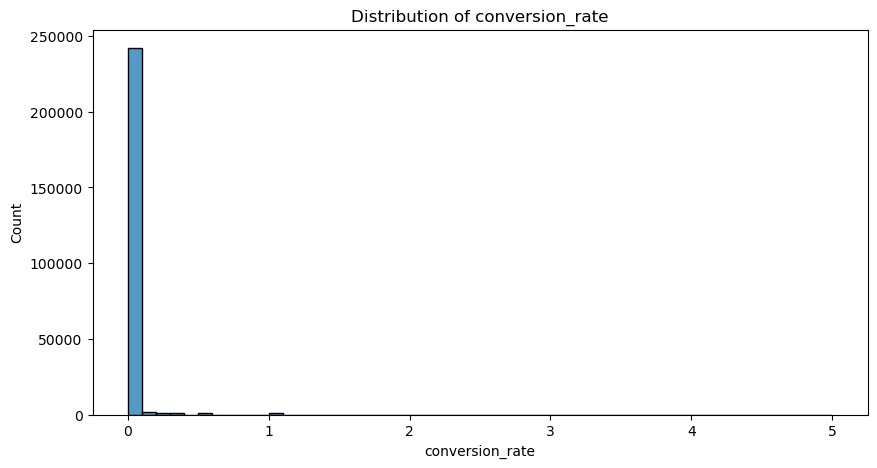

In [169]:
# look at distribution of conversation_rate column and plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(train['conversion_rate'], bins=50)
plt.title('Distribution of conversion_rate')
plt.show()

In [170]:
# look at central tendency of conversion_rate column
print('Central tendency of conversion_rate column:')
print('Mean:', train['conversion_rate'].mean())
print('Median:', train['conversion_rate'].median())
print('Mode:', train['conversion_rate'].mode()[0])


Central tendency of conversion_rate column:
Mean: 0.011410891230025078
Median: 0.0
Mode: 0.0


In [171]:
train['conversion_rate'].describe()

count    248385.000000
mean          0.011411
std           0.085262
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: conversion_rate, dtype: float64

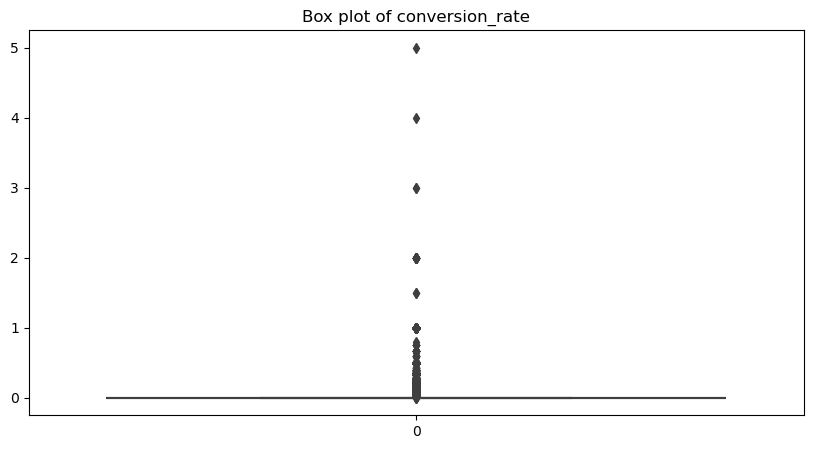

In [172]:
# create a box plot of conversion_rate column
plt.figure(figsize=(10, 5))
sns.boxplot(train['conversion_rate'])
plt.title('Box plot of conversion_rate')
plt.show()

In [173]:
# get number of conversion_rate values that are greater than 1 and less than 0 in terms of percentage
greater_than_1 = train[train['conversion_rate'] > 1].shape[0]
less_than_0 = train[train['conversion_rate'] < 0].shape[0]
total = train.shape[0]
greater_than_1_percentage = (greater_than_1/total)*100
less_than_0_percentage = (less_than_0/total)*100
print('Percentage of conversion_rate values greater than 1:', greater_than_1_percentage)
print('Percentage of conversion_rate values less than 0:', less_than_0_percentage)


Percentage of conversion_rate values greater than 1: 0.012480624836443426
Percentage of conversion_rate values less than 0: 0.0


In [174]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,m_total_vu,conversion_rate,day_of_week,day,month
0,66016,4,464,98,10,0.0,5,1.00,False,4129,511.74,1.0,2020-01-01,0,1,0.0,Wednesday,1,1
1,123432,4,464,234,10,0.0,5,5.59,False,1957,211.19,1.0,2020-01-01,1,2,0.0,Wednesday,1,1
2,1169726,21,464,234,10,0.0,5,6.11,False,2558,116.89,1.0,2020-01-01,2,5,0.0,Wednesday,1,1
3,188236,48,464,234,11500,0.0,16,9999.00,False,1994,749.00,3.0,2020-01-01,3,1,0.0,Wednesday,1,1
4,85080,22,464,234,10,0.0,5,10.96,False,2647,193.57,1.0,2020-01-01,4,87,0.0,Wednesday,1,1


In [175]:
# list number of rows that has higher conversion_rate than 1
print(train[train['conversion_rate'] == 5])

        s_product  s_brand  s_family  s_lowest_category  s_provider  \
107442    1442269       22       464                234          10   

        s_retail_price  s_shipping_time  s_weight  m_has_pdf  \
107442             0.0                5       6.0      False   

        m_length_description  m_unit_price_vat_inc  m_nb_images     s_date  \
107442                  2550                165.94          1.0 2020-01-16   

            id  m_total_vu  conversion_rate day_of_week  day  month  
107442  107442           1              5.0    Thursday   16      1  


In [176]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,m_total_vu,conversion_rate,day_of_week,day,month
0,66016,4,464,98,10,0.0,5,1.00,False,4129,511.74,1.0,2020-01-01,0,1,0.0,Wednesday,1,1
1,123432,4,464,234,10,0.0,5,5.59,False,1957,211.19,1.0,2020-01-01,1,2,0.0,Wednesday,1,1
2,1169726,21,464,234,10,0.0,5,6.11,False,2558,116.89,1.0,2020-01-01,2,5,0.0,Wednesday,1,1
3,188236,48,464,234,11500,0.0,16,9999.00,False,1994,749.00,3.0,2020-01-01,3,1,0.0,Wednesday,1,1
4,85080,22,464,234,10,0.0,5,10.96,False,2647,193.57,1.0,2020-01-01,4,87,0.0,Wednesday,1,1


In [177]:
#drop m_total_vu column
train.drop('m_total_vu', axis=1, inplace=True)


In [178]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,conversion_rate,day_of_week,day,month
0,66016,4,464,98,10,0.0,5,1.00,False,4129,511.74,1.0,2020-01-01,0,0.0,Wednesday,1,1
1,123432,4,464,234,10,0.0,5,5.59,False,1957,211.19,1.0,2020-01-01,1,0.0,Wednesday,1,1
2,1169726,21,464,234,10,0.0,5,6.11,False,2558,116.89,1.0,2020-01-01,2,0.0,Wednesday,1,1
3,188236,48,464,234,11500,0.0,16,9999.00,False,1994,749.00,3.0,2020-01-01,3,0.0,Wednesday,1,1
4,85080,22,464,234,10,0.0,5,10.96,False,2647,193.57,1.0,2020-01-01,4,0.0,Wednesday,1,1


In [179]:
# find the top 10 products that has the highest conversion_rate aggregated by s_product
top_10_products = train.groupby('s_product')['conversion_rate'].mean().sort_values(ascending=False).head(10)
print('Top 10 products with highest conversion rate:')
print(top_10_products)



Top 10 products with highest conversion rate:
s_product
3446348     1.0
7226018     1.0
929925      1.0
12974946    1.0
11434830    1.0
458467      1.0
12364205    1.0
11434804    1.0
3737127     1.0
14130075    1.0
Name: conversion_rate, dtype: float64


In [180]:
# find correlation with conversation_rate and columns s_retail_price, s_shipping_time, m_length_description, m_unit_price_vat_inc, m_total_vu
correlation = train[['conversion_rate', 's_retail_price', 's_shipping_time', 'm_length_description', 'm_unit_price_vat_inc']].corr()
print('Correlation with conversion_rate:')
print(correlation['conversion_rate'])



Correlation with conversion_rate:
conversion_rate         1.000000
s_retail_price         -0.000412
s_shipping_time        -0.042892
m_length_description    0.020170
m_unit_price_vat_inc   -0.029220
Name: conversion_rate, dtype: float64


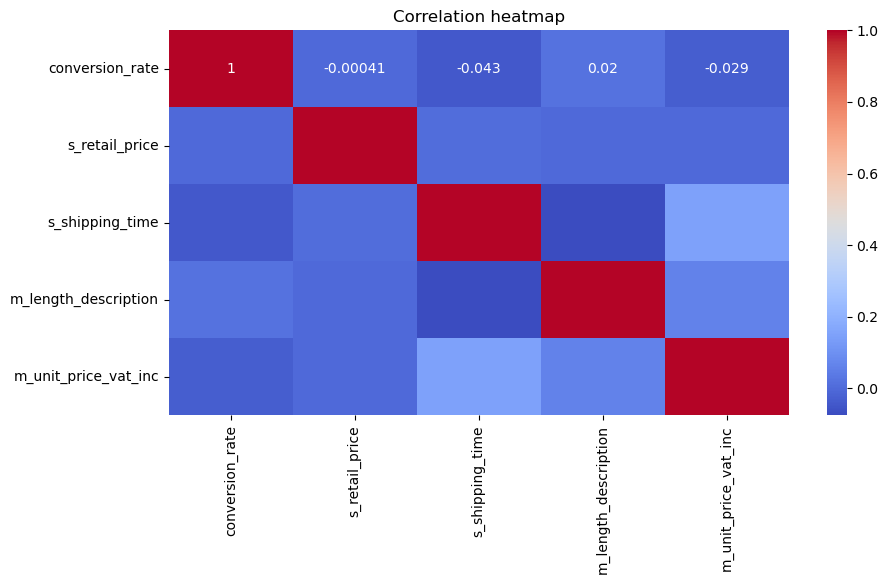

In [181]:
# create a heatmap of this correlation
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [182]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,conversion_rate,day_of_week,day,month
0,66016,4,464,98,10,0.0,5,1.00,False,4129,511.74,1.0,2020-01-01,0,0.0,Wednesday,1,1
1,123432,4,464,234,10,0.0,5,5.59,False,1957,211.19,1.0,2020-01-01,1,0.0,Wednesday,1,1
2,1169726,21,464,234,10,0.0,5,6.11,False,2558,116.89,1.0,2020-01-01,2,0.0,Wednesday,1,1
3,188236,48,464,234,11500,0.0,16,9999.00,False,1994,749.00,3.0,2020-01-01,3,0.0,Wednesday,1,1
4,85080,22,464,234,10,0.0,5,10.96,False,2647,193.57,1.0,2020-01-01,4,0.0,Wednesday,1,1


In [183]:
# label encoder for m_has_pdf, day_of_week, s_date columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['m_has_pdf'] = label_encoder.fit_transform(train['m_has_pdf'])
train['day_of_week'] = label_encoder.fit_transform(train['day_of_week'])
train['s_date'] = label_encoder.fit_transform(train['s_date'])


In [184]:
train.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_images,s_date,id,conversion_rate,day_of_week,day,month
0,66016,4,464,98,10,0.0,5,1.00,0,4129,511.74,1.0,0,0,0.0,6,1,1
1,123432,4,464,234,10,0.0,5,5.59,0,1957,211.19,1.0,0,1,0.0,6,1,1
2,1169726,21,464,234,10,0.0,5,6.11,0,2558,116.89,1.0,0,2,0.0,6,1,1
3,188236,48,464,234,11500,0.0,16,9999.00,0,1994,749.00,3.0,0,3,0.0,6,1,1
4,85080,22,464,234,10,0.0,5,10.96,0,2647,193.57,1.0,0,4,0.0,6,1,1


In [185]:
# create a feature matrix X and target vector y
X_train = train.drop('conversion_rate', axis=1)
y_train = train['conversion_rate']


In [186]:
# split train data into train and validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [187]:
# create a linear regression model
from sklearn.linear_model import LinearRegression
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)


LinearRegression()

In [188]:
X_val.missing_values = X_val.isnull()
X_val.missing_values = X_val.isnull().mean()*100
print('Missing values for each column in percentage:')
print(X_val.missing_values)

Missing values for each column in percentage:
s_product               0.0
s_brand                 0.0
s_family                0.0
s_lowest_category       0.0
s_provider              0.0
s_retail_price          0.0
s_shipping_time         0.0
s_weight                0.0
m_has_pdf               0.0
m_length_description    0.0
m_unit_price_vat_inc    0.0
m_nb_images             0.0
s_date                  0.0
id                      0.0
day_of_week             0.0
day                     0.0
month                   0.0
dtype: float64


In [189]:
#evalute the linear regression model and get all performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model_linear_regression.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.021861754436304524
Mean Squared Error: 0.00711197113551156
Root Mean Squared Error: 0.08433250343439094
R2 Score: 0.0055744712500751525


In [190]:
# create alasso regression model
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)


Lasso()

In [191]:
# evaluate the laso regression model and get all performance metrics including Weighted MSE
y_pred = model_lasso.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Mean Absolute Error: 0.021772690433803723
Mean Squared Error: 0.0071339052483920815
Root Mean Squared Error: 0.08446244874731067
R2 Score: 0.0025075519131895208


In [192]:
# apply cross validation on linear regression model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_linear_regression, X_train, y_train, cv=5, scoring='r2')
print('Cross validation scores:', scores)
print('Mean of cross validation scores:', scores.mean())




Cross validation scores: [0.00532693 0.00467653 0.00393663 0.00486594 0.00531489]
Mean of cross validation scores: 0.004824183286597261


In [193]:
# look at feature importance of linear regression model
feature_importance = model_linear_regression.coef_
feature_importance = pd.Series(feature_importance, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print('Feature importance:')
print(feature_importance)


Feature importance:
m_has_pdf               1.454912e-03
m_nb_images             1.325414e-03
s_date                  7.795334e-04
day                     7.795334e-04
day_of_week             6.352590e-04
m_length_description    7.710184e-07
s_provider              1.302040e-09
s_product               8.566718e-11
month                   0.000000e+00
s_retail_price         -1.261952e-10
s_brand                -1.262402e-09
id                     -2.096732e-07
s_weight               -4.013545e-07
s_lowest_category      -1.144389e-06
m_unit_price_vat_inc   -2.226332e-06
s_family               -2.213099e-05
s_shipping_time        -3.296357e-04
dtype: float64


In [194]:
# give me the list of important and non-important features
important_features = feature_importance[feature_importance != 0]
non_important_features = feature_importance[feature_importance == 0]
print('Important features:')
print(important_features)
print('Non-important features:')
print(non_important_features)


Important features:
m_has_pdf               1.454912e-03
m_nb_images             1.325414e-03
s_date                  7.795334e-04
day                     7.795334e-04
day_of_week             6.352590e-04
m_length_description    7.710184e-07
s_provider              1.302040e-09
s_product               8.566718e-11
s_retail_price         -1.261952e-10
s_brand                -1.262402e-09
id                     -2.096732e-07
s_weight               -4.013545e-07
s_lowest_category      -1.144389e-06
m_unit_price_vat_inc   -2.226332e-06
s_family               -2.213099e-05
s_shipping_time        -3.296357e-04
dtype: float64
Non-important features:
month    0.0
dtype: float64


In [195]:
# give me adjusted squared, R squared, f-statistic, p-value of the model
from sklearn.feature_selection import f_regression
f_statistic, p_value = f_regression(X_train, y_train)
f_statistic = pd.Series(f_statistic, index=X_train.columns)
p_value = pd.Series(p_value, index=X_train.columns)
print('F Statistic:')
print(f_statistic)
print('P Value:')
print(p_value)


F Statistic:
s_product                37.752486
s_brand                   2.251089
s_family                141.367520
s_lowest_category        31.442384
s_provider              251.636044
s_retail_price            0.040555
s_shipping_time         362.482778
s_weight                 26.476954
m_has_pdf                 0.969616
m_length_description     76.632480
m_unit_price_vat_inc    168.234406
m_nb_images              35.497725
s_date                   15.685763
id                       18.374541
day_of_week              42.181367
day                      15.685763
month                     0.000000
dtype: float64
P Value:
s_product               8.046598e-10
s_brand                 1.335220e-01
s_family                1.371662e-32
s_lowest_category       2.057187e-08
s_provider              1.237701e-56
s_retail_price          8.403998e-01
s_shipping_time         9.573558e-81
s_weight                2.669538e-07
m_has_pdf               3.247773e-01
m_length_description    2.074913e-1

In [196]:
# give me coefficients of the model
coefficients = model_linear_regression.coef_
coefficients = pd.Series(coefficients, index=X_train.columns)
print('Coefficients:')
print(coefficients)


Coefficients:
s_product               8.566718e-11
s_brand                -1.262402e-09
s_family               -2.213099e-05
s_lowest_category      -1.144389e-06
s_provider              1.302040e-09
s_retail_price         -1.261952e-10
s_shipping_time        -3.296357e-04
s_weight               -4.013545e-07
m_has_pdf               1.454912e-03
m_length_description    7.710184e-07
m_unit_price_vat_inc   -2.226332e-06
m_nb_images             1.325414e-03
s_date                  7.795334e-04
id                     -2.096732e-07
day_of_week             6.352590e-04
day                     7.795334e-04
month                   0.000000e+00
dtype: float64


In [197]:
test = pd.read_csv('test.csv')


In [198]:
test.head()

,s_product,s_brand,s_family,s_lowest_category,s_provider,s_retail_price,s_shipping_time,s_weight,m_avg_article_rating,m_has_pdf,m_length_description,m_unit_price_vat_inc,m_nb_article_rating,m_nb_images,s_date,id
0,123432,4,464,234,10,0.00000,5,5.59,5.00,False,1957,209.99,2.0,1.0,2020-02-01,248386
1,247203,71,464,98,10,0.00000,5,6.96,4.66,False,3931,460.63,9.0,3.0,2020-02-01,248387
2,74806,22,464,234,11500,0.00000,16,9999.00,NaN,False,1434,204.00,NaN,1.0,2020-02-01,248388
3,524190,22,464,234,10,164.42750,5,5.38,4.54,False,3797,159.00,104.0,3.0,2020-02-01,248389
4,28189,4,464,234,233394,236.58346,5,5.00,4.50,False,1201,262.19,26.0,4.0,2020-02-01,248390


In [199]:
# crewate day of the week, day, month, year columns in test data
test['s_date'] = pd.to_datetime(test['s_date'])
test['day_of_week'] = test['s_date'].dt.day_name()
test['day'] = test['s_date'].dt.day
test['month'] = test['s_date'].dt.month
test['s_date'] = label_encoder.fit_transform(test['s_date'])
test['day_of_week'] = label_encoder.fit_transform(test['day_of_week'])


In [200]:
# drop m_avg_article_rating and m_nb_article_rating columns
test.drop(['m_avg_article_rating', 'm_nb_article_rating'], axis=1, inplace=True)


In [201]:
# predict the test data using linear regression model
y_pred = model_linear_regression.predict(test)
y_pred = pd.Series(y_pred)
y_pred.to_csv('submission.csv', index=False)
